# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1-5)**2))
X = sm.add_constant(X)
beta = [5., 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [6]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     891.7
Date:                Wed, 29 May 2019   Prob (F-statistic):           9.58e-41
Time:                        16:46:19   Log-Likelihood:               -0.63374
No. Observations:                  50   AIC:                             9.267
Df Residuals:                      46   BIC:                             16.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9498      0.087     56.841      0.0

## In-sample prediction

In [8]:
ypred = olsres.predict()
print(ypred)

[ 4.40064188  4.93669122  5.42637184  5.83704986  6.14786878  6.35317617
  6.46345236  6.5035885   6.50879708  6.51882656  6.57143085  6.69616643
  6.90953631  7.21227864  7.58924541  8.01189125  8.44296334  8.84262195
  9.174986    9.41402818  9.54785125  9.58064261  9.53198641  9.43364591
  9.32434483  9.24340519  9.2242868   9.28908992  9.44492422  9.68274072
  9.97881847 10.29866189 10.60266823 10.85263425 11.01803286 11.08102865
 11.03940822 10.9069438  10.71113053 10.48866907 10.27943583 10.11993132
 10.03728328 10.04478964 10.13973371 10.30383053 10.50623104 10.70859047
 10.87136832 10.96032471]


## Create a new sample of explanatory variables Xnew, predict and plot

In [9]:
x1n = np.linspace(20.5,25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n-5)**2))
Xnew = sm.add_constant(Xnew)
ynewpred =  olsres.predict(Xnew) # predict out of sample
print(ynewpred)

[10.9357244  10.75399935 10.43863211 10.04313643  9.63795521  9.29321365
  9.06155015  8.96522858  8.99068733  9.09185962]


## Plot comparison

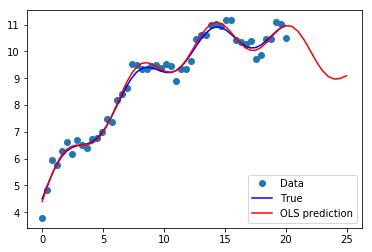

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, 'o', label="Data")
ax.plot(x1, y_true, 'b-', label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="lower right");

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [13]:
from statsmodels.formula.api import ols

data = {"x1" : x1, "y" : y}
res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we don't want any expansion magic from using `**2`

In [14]:
res.params

Intercept           4.949802
x1                  0.520315
np.sin(x1)          0.598797
I((x1 - 5) ** 2)   -0.021966
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [15]:
res.predict(exog=dict(x1=x1n))

0    10.935724
1    10.753999
2    10.438632
3    10.043136
4     9.637955
5     9.293214
6     9.061550
7     8.965229
8     8.990687
9     9.091860
dtype: float64